# Classification Performance

- Static performance: Confusion matrix (accuracy, precision, recall, h1)
- Dynamic performance: ROC/AUC

## Setup

In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc # performance evaluation library
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

##  Static performance and Confusion_matrix

### Make dataset

In [35]:
# evaluation (prediction) score: score or probability
y_score = np.linspace(99, 60, 20).round(1)
print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


In [36]:
# Prediction classes
y_pred=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0]
len(y_pred)
y_pred.count(1), y_pred.count(0)

(14, 6)

In [37]:
# Real classes
y_test=[1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0]
y_test.count(1), y_test.count(0)

(10, 10)

In [38]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
0,1,1
1,1,1
2,0,1
3,1,1
4,0,1
5,1,1
6,1,1
7,1,1
8,0,1
9,0,1


### Confustion Matrix

In [39]:
confusion_matrix(y_test, y_pred)

array([[5, 5],
       [1, 9]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.64      0.90      0.75        10

    accuracy                           0.70        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.74      0.70      0.69        20



- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

- precision_0 = 5/(5+1) = 0.83
- precision_1 = 9/(5+9) = 0.64
- macro average precision = (0.83 + 0.64)/2 = 0.735
- micro average precision = (5+9)/(6+14) = 0.7
- weighted average precision = 0.83x10/20 + 0.64x10/20 = 0.735

## Dynamic performance
- Ranking-based or Score-based


### Make dataset

In [41]:
result = pd.DataFrame(list(zip(y_score, y_pred, y_test)), 
                      columns=['score', 'predict', 'real'])
result['correct'] = (result.predict == result.real)
result.head(20)

,score,predict,real,correct
0,99.0,1,1,True
1,96.9,1,1,True
2,94.9,1,0,False
3,92.8,1,1,True
4,90.8,1,0,False
5,88.7,1,1,True
6,86.7,1,1,True
7,84.6,1,1,True
8,82.6,1,0,False
9,80.5,1,0,False


### ROC and AUC

ROC로 성능 평가 (맞춘 **순서**를 평가)
- tpr = TP/P = TP/(TP+FN) : 실제 P 인경우 대비 TP 비율 (= recall)
- fpr = FP/N = FP/(FP+TN) : 실제 N 인 경우 대비 FP 비율

In [42]:
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

fpr, tpr, thresholds1 = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

In [43]:
y_score, y_test

(array([99. , 96.9, 94.9, 92.8, 90.8, 88.7, 86.7, 84.6, 82.6, 80.5, 78.5,
        76.4, 74.4, 72.3, 70.3, 68.2, 66.2, 64.1, 62.1, 60. ]),
 [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [44]:
pd.DataFrame([thresholds1, tpr, fpr], index=['threshold','tpr','fpr'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
threshold,100.0,99.0,96.9,94.9,92.8,90.8,84.6,80.5,78.5,76.4,72.3,70.3,68.2,60.0
tpr,0.0,0.1,0.2,0.2,0.3,0.3,0.6,0.6,0.7,0.7,0.9,0.9,1.0,1.0
fpr,0.0,0.0,0.0,0.1,0.1,0.2,0.2,0.4,0.4,0.5,0.5,0.6,0.6,1.0


In [12]:
# just to see how many 1 and 0 are in the test set
total_p, total_n  = (np.array(y_test)==1).sum(), (np.array(y_test)==0).sum()
total_p, total_n

(10, 10)

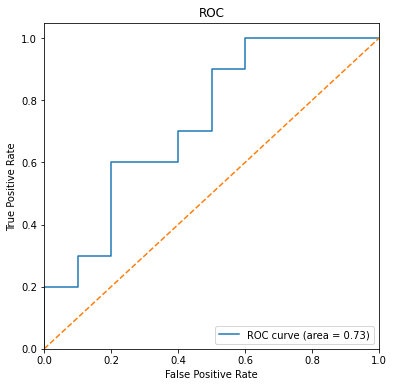

In [13]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

#### 3명의 능력 비교

In [45]:
y_real=[[1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0],
        [1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0]]

In [46]:
y_score, y_real[0]

(array([99. , 96.9, 94.9, 92.8, 90.8, 88.7, 86.7, 84.6, 82.6, 80.5, 78.5,
        76.4, 74.4, 72.3, 70.3, 68.2, 66.2, 64.1, 62.1, 60. ]),
 [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

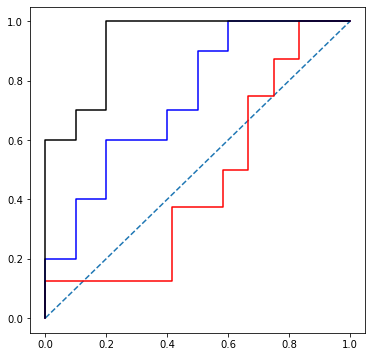

In [47]:
plt.figure(figsize=(6,6))    
fpr = dict()
tpr = dict()
plt.plot([0, 1], [0, 1], linestyle='--')

my_color = ['r', 'b', 'k']
for i in range(3):
    fpr, tpr, _ = roc_curve(y_real[i], y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, c=my_color[i])

## Precision and Recall
- Precision = TruePositives / (TruePositives + FalsePositives)
- Recall = TruePositives / (TruePositives + FalseNegatives)
- Both the precision and the recall are focused on **only the positive class** (the minority class) and are unconcerned with the true negatives (majority class).
- precision-recall curve (PR curve): precision and recall for different probability threshold
- **Precision-recall curves (PR curves) are recommended for highly skewed domains where ROC curves may provide an excessively optimistic view of the performance.**

In [51]:
y_pred

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

In [54]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

precision, recall, thresholds2 = precision_recall_curve(y_test, y_score)

In [55]:
precision, recall, thresholds2[::-1], y_score

(array([0.625     , 0.6       , 0.64285714, 0.61538462, 0.58333333,
        0.63636364, 0.6       , 0.66666667, 0.75      , 0.71428571,
        0.66666667, 0.6       , 0.75      , 0.66666667, 1.        ,
        1.        , 1.        ]),
 array([1. , 0.9, 0.9, 0.8, 0.7, 0.7, 0.6, 0.6, 0.6, 0.5, 0.4, 0.3, 0.3,
        0.2, 0.2, 0.1, 0. ]),
 array([99. , 96.9, 94.9, 92.8, 90.8, 88.7, 86.7, 84.6, 82.6, 80.5, 78.5,
        76.4, 74.4, 72.3, 70.3, 68.2]),
 array([99. , 96.9, 94.9, 92.8, 90.8, 88.7, 86.7, 84.6, 82.6, 80.5, 78.5,
        76.4, 74.4, 72.3, 70.3, 68.2, 66.2, 64.1, 62.1, 60. ]))

In [57]:
thresholds1, thresholds2[::-1]  # little different

(array([100. ,  99. ,  96.9,  94.9,  92.8,  90.8,  84.6,  80.5,  78.5,
         76.4,  72.3,  70.3,  68.2,  60. ]),
 array([99. , 96.9, 94.9, 92.8, 90.8, 88.7, 86.7, 84.6, 82.6, 80.5, 78.5,
        76.4, 74.4, 72.3, 70.3, 68.2]))

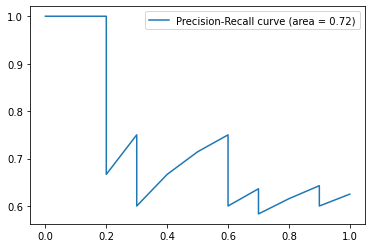

In [58]:
auc_score = auc(recall, precision)
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % auc_score)
plt.legend(loc="upper right")

# An example

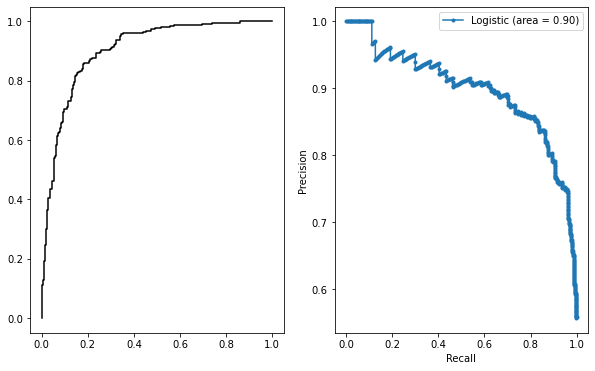

[0.0061375  0.00623691 0.0064424  0.00653738 0.00726041 0.00734682
 0.00766567 0.00784434 0.00840961 0.00853147]


In [59]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
model = LogisticRegression()
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

plt.figure(figsize=(10,6))
# ROC curve
plt.subplot(1,2,1)
fpr, tpr, _ = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, c=my_color[i])
# PR curve
plt.subplot(1,2,2)
precision, recall, thresholds = precision_recall_curve(y_test, y_score[:,1])
auc_score = auc(recall, precision)
plt.plot(recall, precision, marker='.', label='Logistic (area = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()
print( thresholds[:10])

In [60]:
(y == 0).sum(), (y == 1).sum()  # balanced

(501, 499)

- In general, the higher AUC score, the better model. <span style="color:red">But, you have to be very careful when there is **huge imbalance in the dataset**. </span>

# Another example with highly imbalanced dataset

In [61]:
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

print('Dataset: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Train: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Test: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Dataset: Class0=985, Class1=15
Train: Class0=492, Class1=8
Test: Class0=493, Class1=7


Logistic ROC AUC 0.869


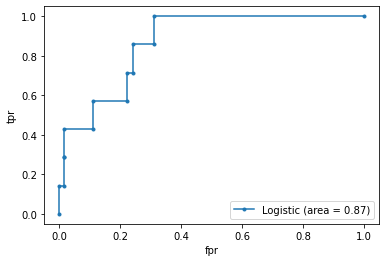

In [62]:
# roc curve and roc auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
 
# plot no skill and model roc curves
def plot_roc_curve(y_test, model_score, auc):
	fpr, tpr, _ = roc_curve(y_test, model_score)
	plt.plot(fpr, tpr, marker='.', label='Logistic (area = %0.2f)' % auc)

	pyplot.xlabel('fpr')
	pyplot.ylabel('tpr')
	pyplot.legend()
	pyplot.show()
 
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)
model_score = y_score[:, 1]   # prob[yi=1]
roc_auc = roc_auc_score(y_test, model_score)
print('Logistic ROC AUC %.3f' % roc_auc)
plot_roc_curve(y_test, model_score, roc_auc)

Logistic PR AUC: 0.228


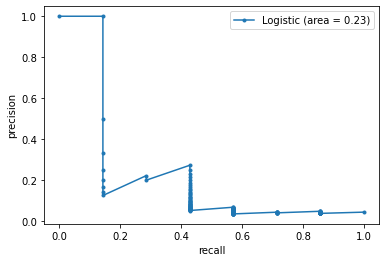

In [63]:
def plot_pr_curve(y_test, model_score, auc):
	precision, recall, _ = precision_recall_curve(y_test, model_score)
	plt.plot(recall, precision, marker='.', label='Logistic (area = %0.2f)' % auc)
	pyplot.xlabel('recall')
	pyplot.ylabel('precision')
	pyplot.legend()
	pyplot.show()
 
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)
model_score = y_score[:, 1]   # prob[yi=1]
precision, recall, _ = precision_recall_curve(y_test, model_score)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

plot_pr_curve(y_test, model_score, auc_score )

- We can see the zig-zag line and close to zero.
- Notice that the ROC and PR curves tell a different story.
- The PR curve focuses on the positive (minority) class, whereas the ROC curve covers both classes.